# Credit Card Fraud Detection via Machine Learning Techniques (RF & DT)

---
---


---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.offline as py
import plotly.figure_factory as ff
# import cufflinks as cf

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("creditcard.csv")
df = data.copy()
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Exploratory Data Analysis

In [3]:
df.shape

(284807, 31)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
df.duplicated().sum()

1081

In [7]:
df.drop_duplicates(inplace=True)

## Class Analysis against other Features

#### Distribution of 1,0 in Class

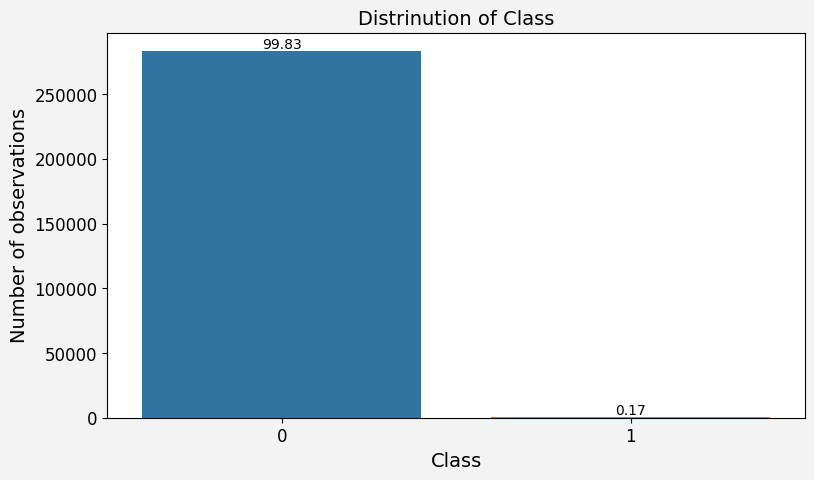

In [8]:
# The classes are heavily skewed we need to solve this issue later.

fig = plt.figure(figsize=(9,5))
fig.set_facecolor("#F3F3F3")
total = float(len(df)) 
ax = sns.countplot(x="Class",  data=df)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Number of observations', fontsize=14)
plt.title('Distrinution of Class', fontsize =14)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 3, '{:1.2f}'.format(100*height/total), 
            ha="center",va='bottom')
ax.grid(False)
plt.tick_params(labelsize=12)
plt.show();

In [9]:
df['Class'].value_counts()

0    283253
1       473
Name: Class, dtype: int64

##### Dataset is highly imbalanced

In [10]:
#legit
df[df.Class == 0].Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [11]:
#fraud
df[df.Class == 1].Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Time distribution for Non-Fraud Transactions')

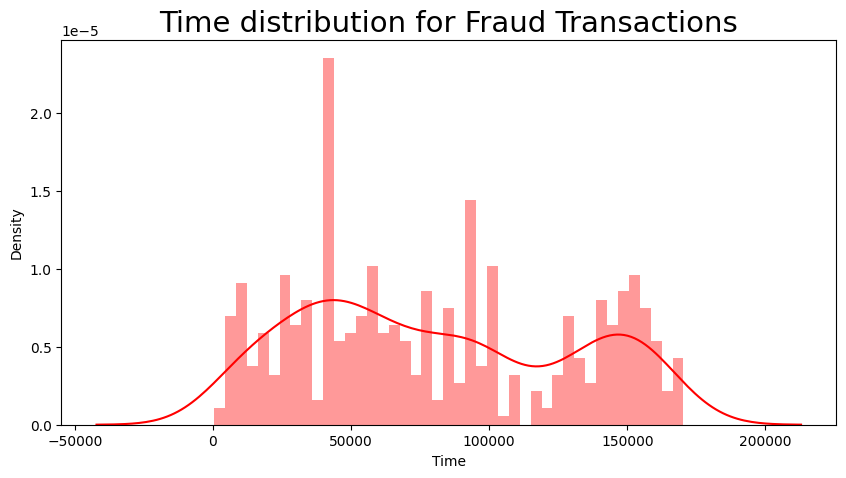

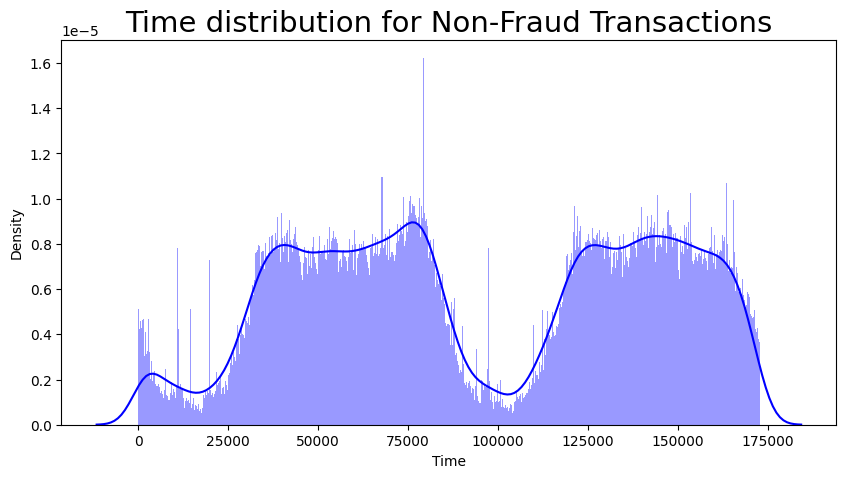

In [12]:
# Checking the frequency of Fraud Transactions with respect to time
import math
plt.figure(figsize = (10,5))
sns.distplot(df['Time'].loc[df['Class']==1],bins = int(math.sqrt(len(df['Time'].loc[df['Class']==1]))*2), color='red')
plt.title("Time distribution for Fraud Transactions", fontsize=21)

# Checking the frequency of Non-Fraud Transactions with respect to time
plt.figure(figsize = (10,5))
sns.distplot(df['Time'].loc[df['Class']==0],bins = int(math.sqrt(len(df['Time'].loc[df['Class']==0]))*2), color = 'blue')
plt.title("Time distribution for Non-Fraud Transactions", fontsize=21)

#### Corr of other features with Class

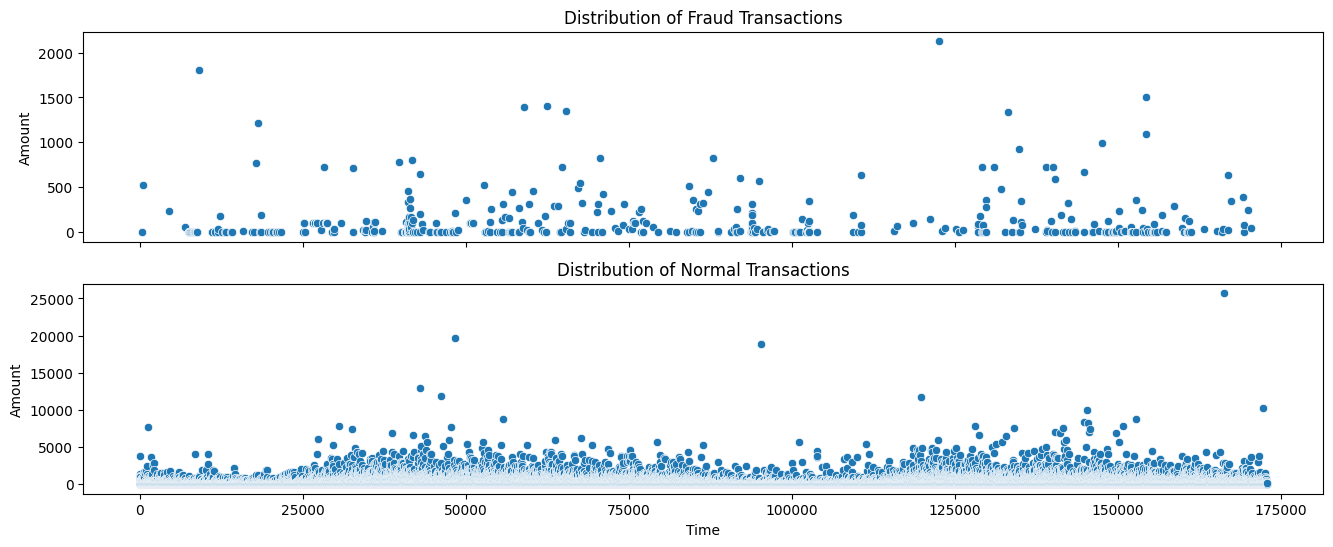

In [13]:
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='Time',y='Amount', data=df[df['Class']==0], ax=axs[1])
axs[1].set_title("Distribution of Normal Transactions")

plt.show()

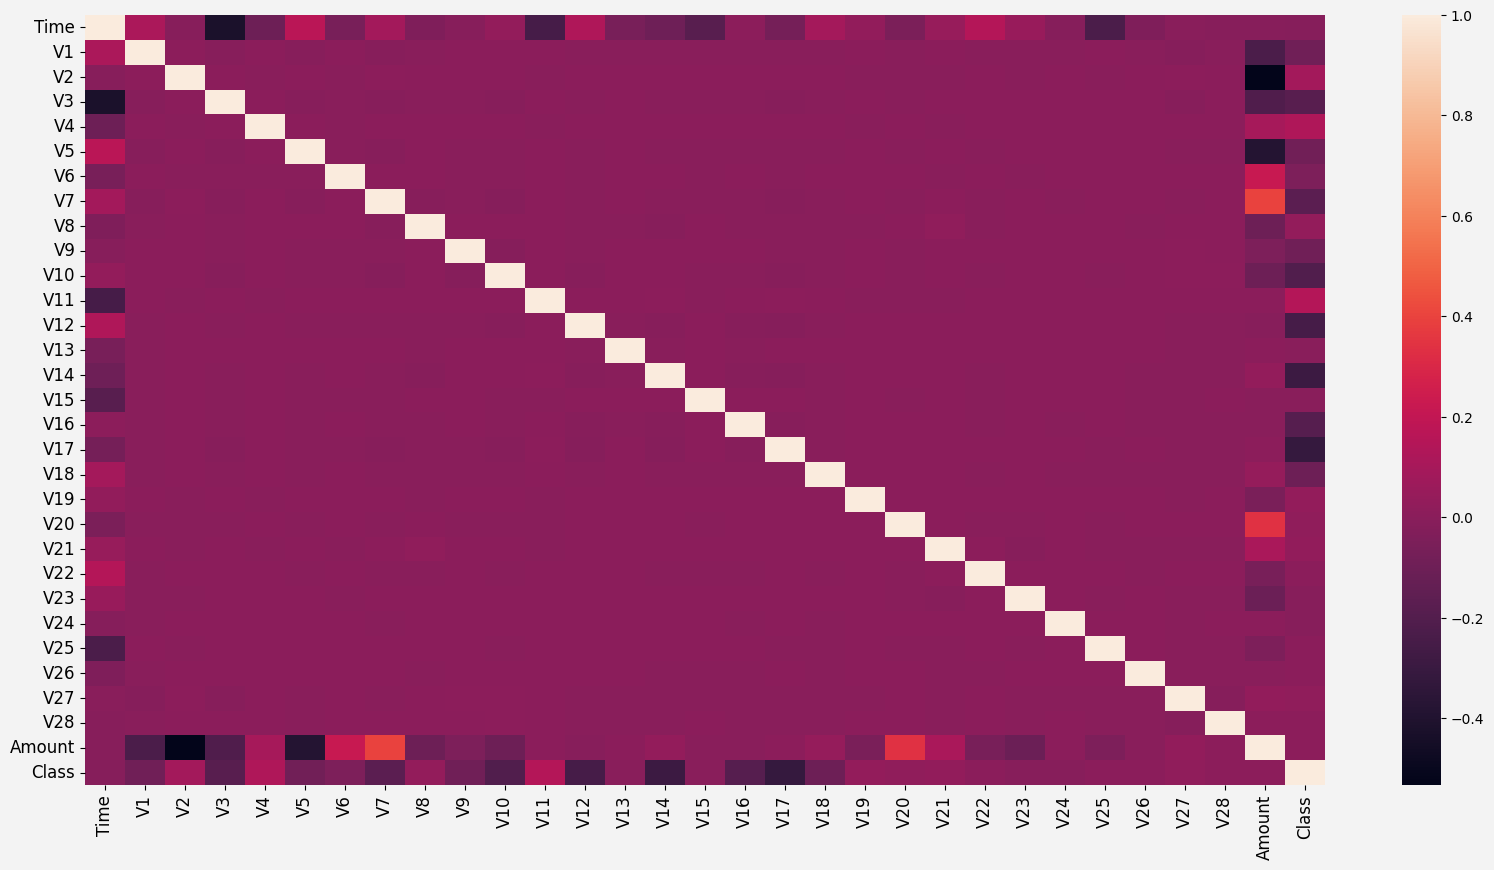

In [14]:
# Evaluate the correlation between different parameters in the dataset if any 

creditcard_corr=df.corr()
fig = plt.figure(figsize=(20,10))
fig.set_facecolor("#F3F3F3")
ax=sns.heatmap(creditcard_corr)
plt.tick_params(labelsize=12)
plt.show();

Few insights on the visualization above reveal the following:

V7 and V20 are positively correlated with the amount.
V2 and V5 are negatively correlated with the amount.

### Exploring Highly Correlated Features

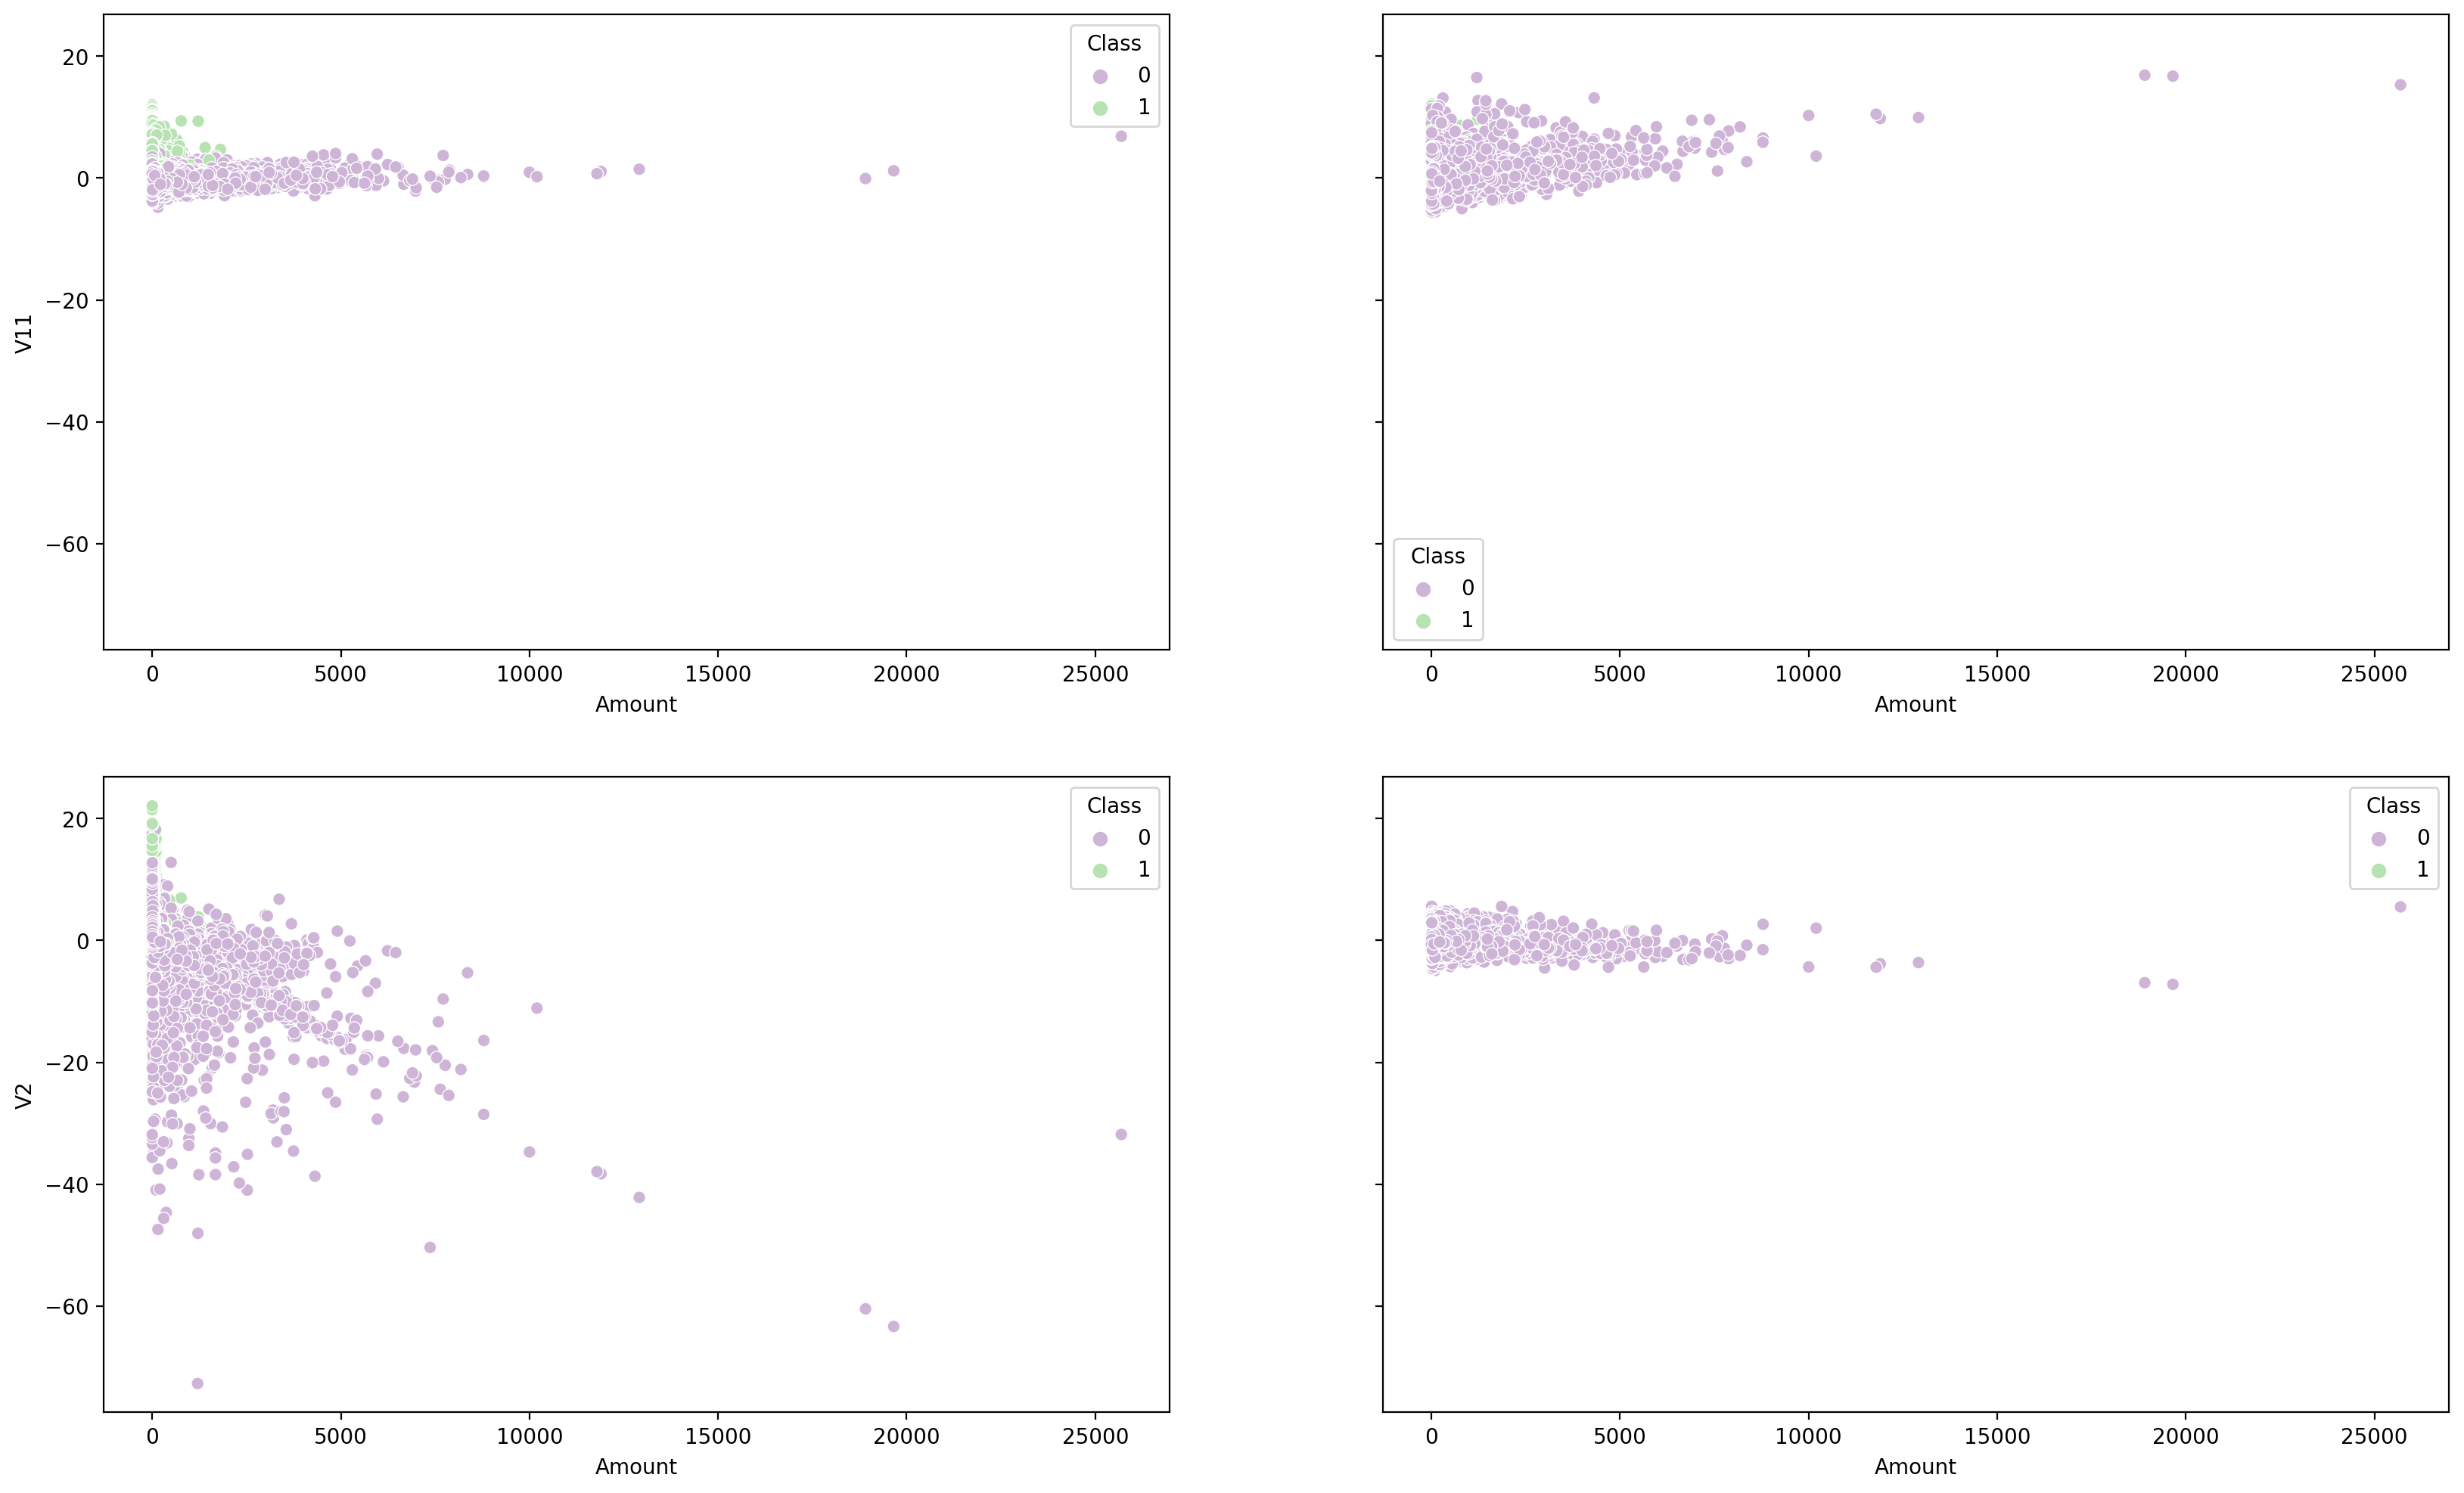

In [15]:
f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V11', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V4', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V2', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V19', hue = 'Class',  ax=ax[1,1], palette='PRGn');

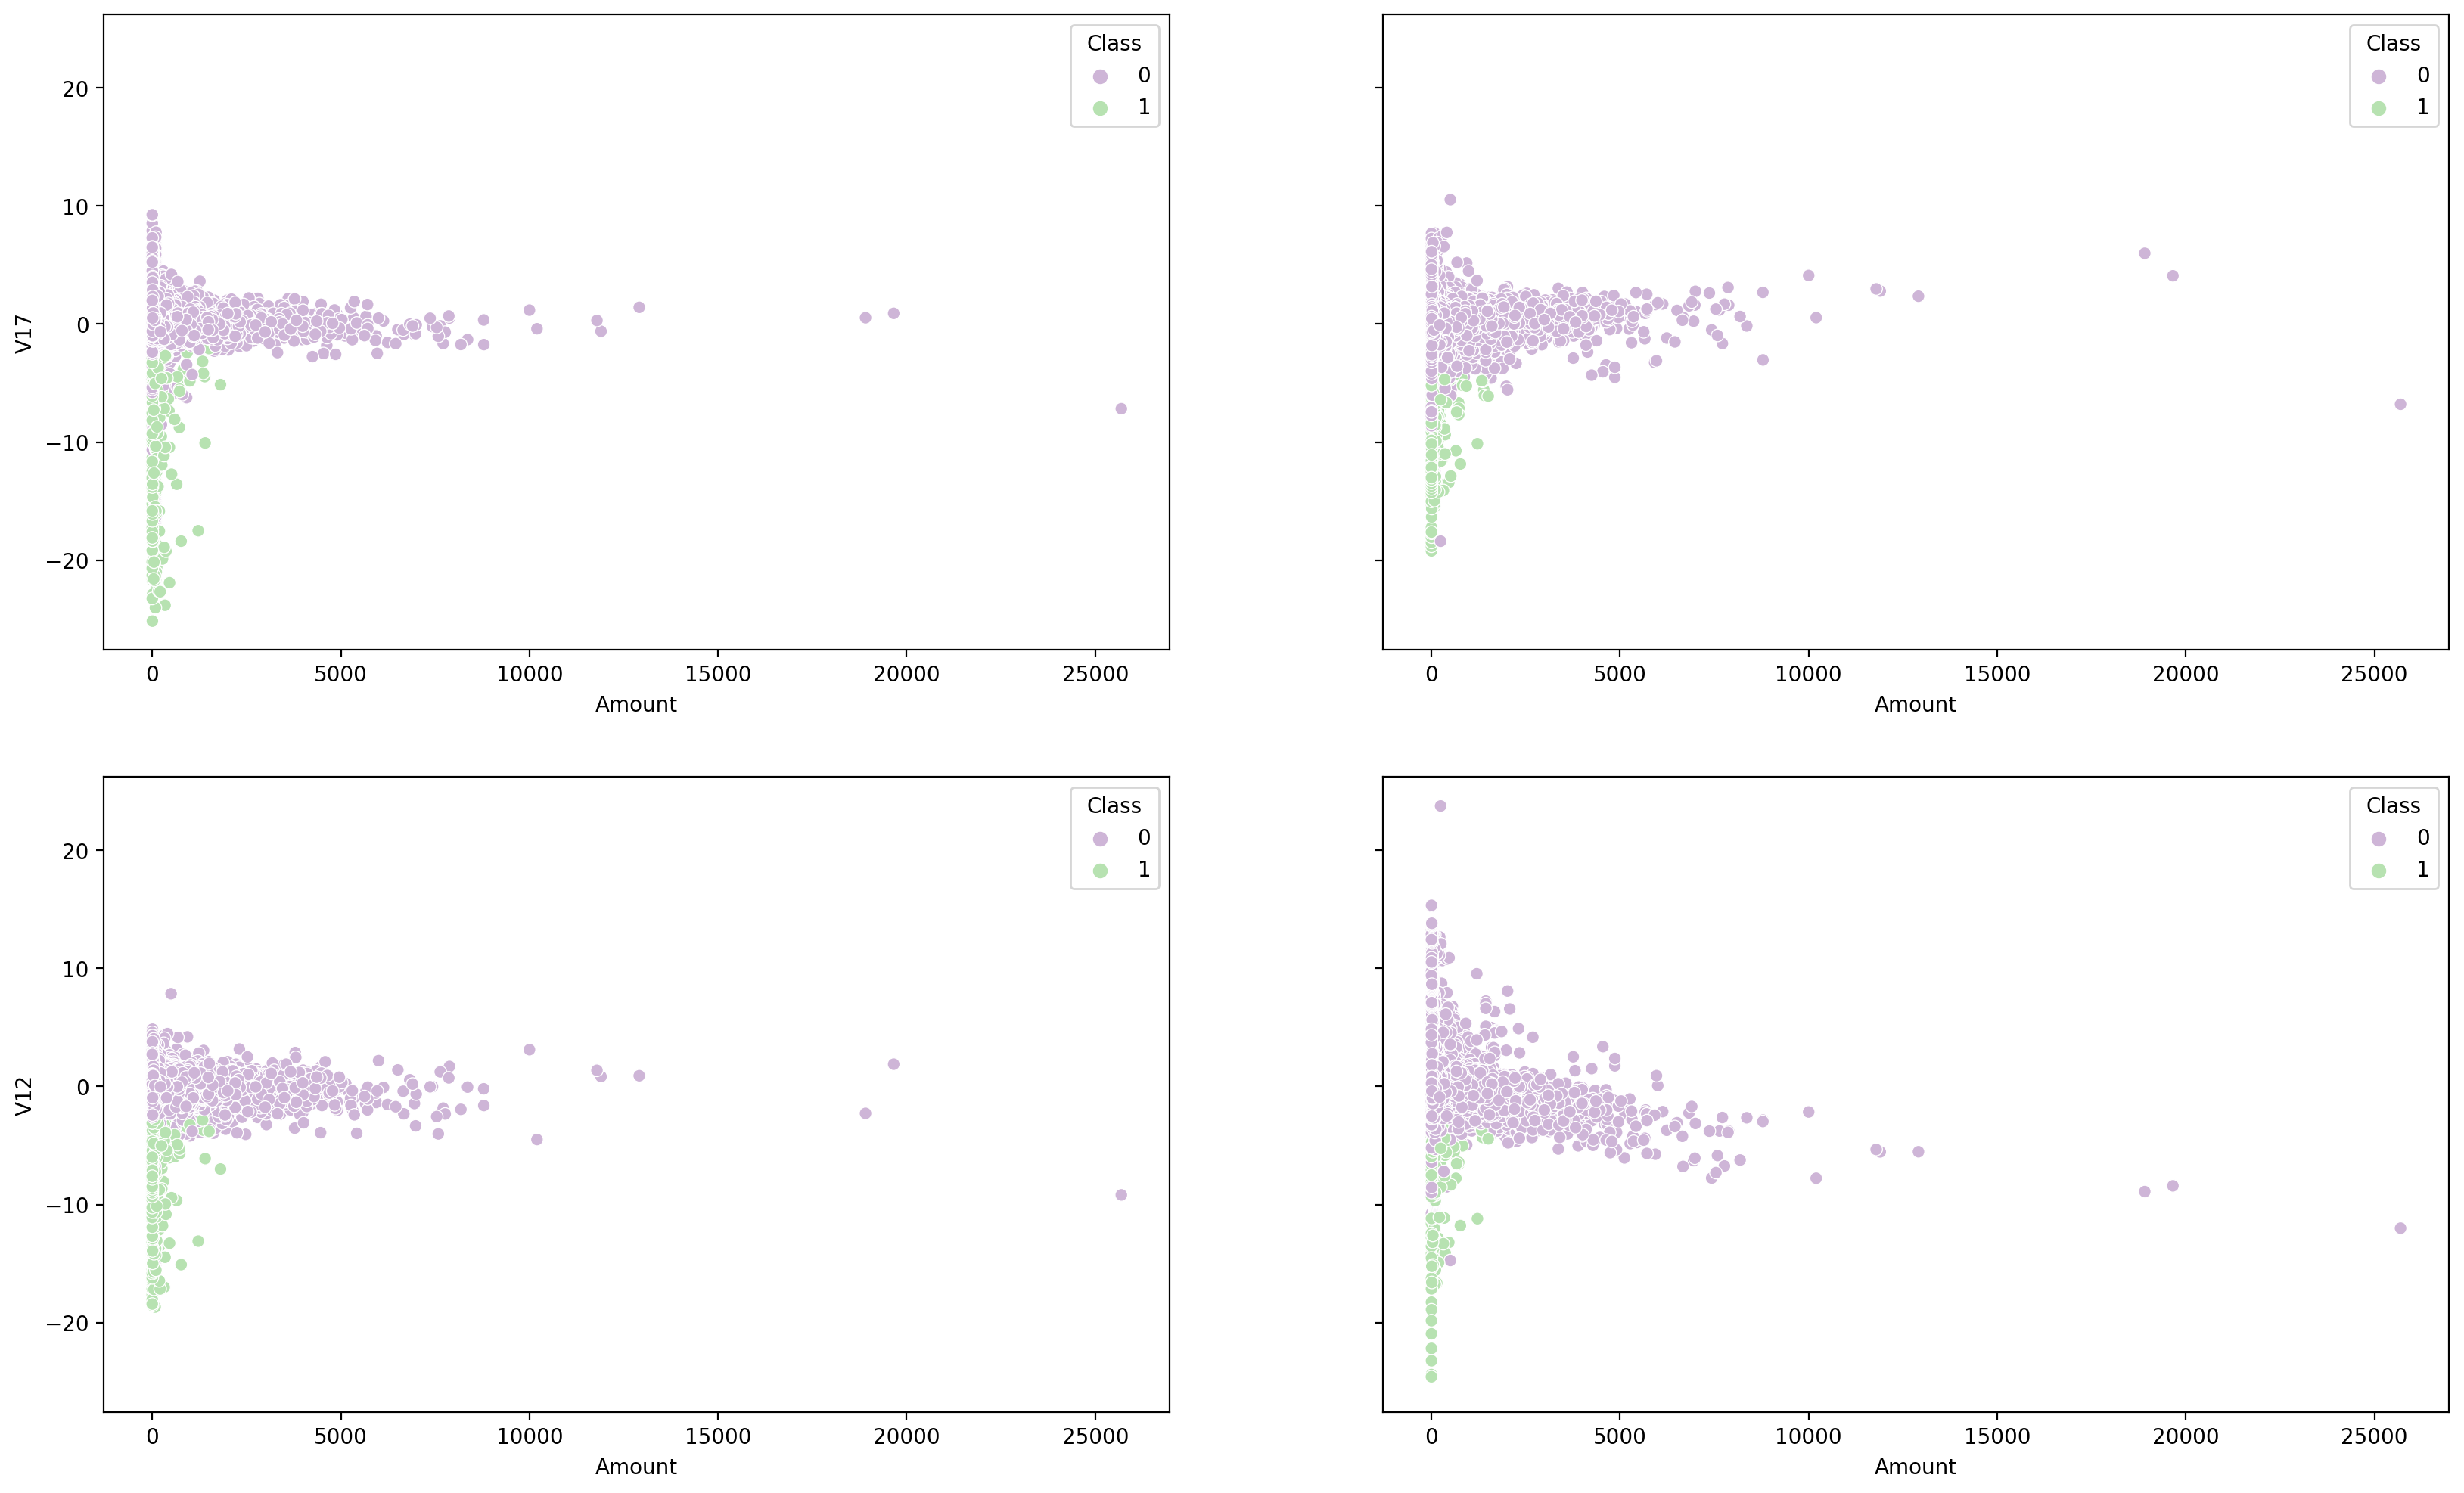

In [16]:
f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
sns.scatterplot(data = df, x ='Amount', y = 'V17', hue = 'Class',  ax=ax[0,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V14', hue =  'Class', ax=ax[0,1], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V12', hue = 'Class',  ax=ax[1,0], palette='PRGn')
sns.scatterplot(data = df, x ='Amount', y = 'V10', hue = 'Class',  ax=ax[1,1], palette='PRGn');

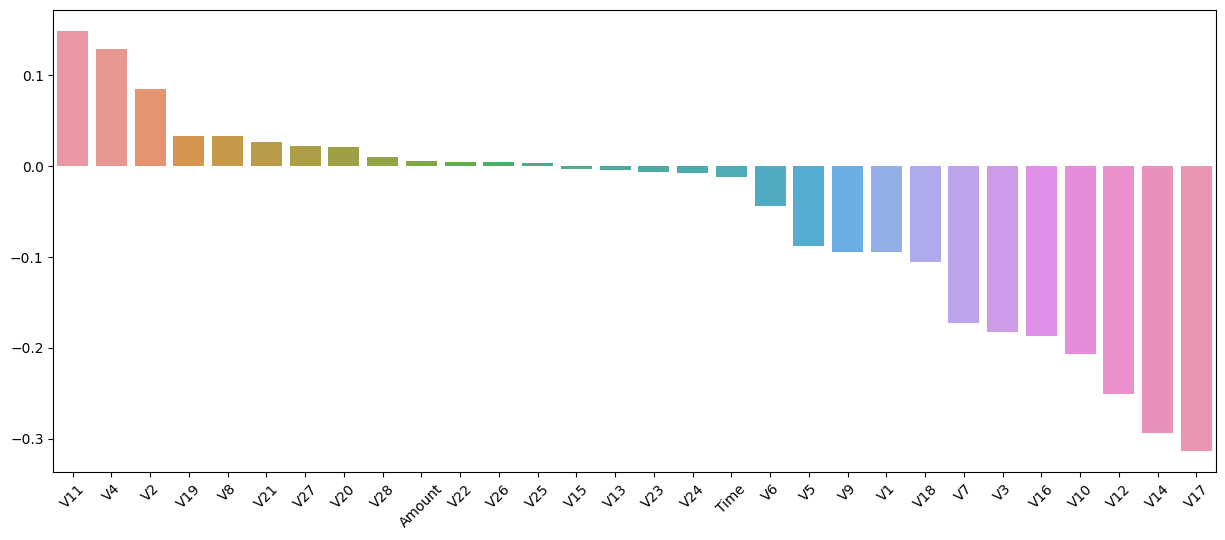

In [17]:
plt.figure(figsize = (15,6),dpi = 100)
sns.barplot(x = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).index,
            y = df.corr()["Class"].drop(index="Class").sort_values(ascending=False).values)
plt.xticks(rotation = 45);

### We set a threshold value for highly correlated columns

From the results above, we can see that there are more false negatives than false positives. This cannot be a smart model because ignoring the probability of a transaction being fraud when there actually is one is very dangerous. It is a very serious data breach! So we need to lower the probability threshold in order to increase the true positive rate.

Recall is more important than precision in case of credit card fraud detection.
This is because it is acceptable to an extent that a non-fraud transaction is labelled as fraud (can be resolved by calling up and asking for additional details from the customer/bank).
However, it is dangerous to label a fraud as non-fraud (in such scenario, a fraud transaction will go ahead without any checks)

In [18]:
df[(df["V17"] < 0.4 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6331,7526.0,0.008430,4.137837,-6.240697,6.675732,0.768307,-3.353060,-1.631735,0.154612,-2.795892,...,0.364514,-0.608057,-0.539528,0.128940,1.488481,0.507963,0.735822,0.513574,1.00,1
6334,7535.0,0.026779,4.132464,-6.560600,6.348557,1.329666,-2.513479,-1.689102,0.303253,-3.139409,...,0.370509,-0.576752,-0.669605,-0.759908,1.605056,0.540675,0.737040,0.496699,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [19]:
(df["V10"] < 0.2).value_counts()

True     190409
False     93317
Name: V10, dtype: int64

In [20]:
df[(df["V14"]< 0.5 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [21]:
df[(df["V12"]< 0.1 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276864,167338.0,-1.374424,2.793185,-4.346572,2.400731,-1.688433,0.111136,-0.922038,-2.149930,-2.027474,...,-0.870779,0.504849,0.137994,0.368275,0.103137,-0.414209,0.454982,0.096711,349.08,1
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1


In [22]:
df[(df["V10"]< 0.2 ) & (df["Class"] == 1)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


## Generated new data to try algorithms.

In [23]:
df_filter = df[(df["Class"] == 1) | (df["V17"]< 0.4) & (df["V14"]< 0.5) & (df["V12"] < 0.1) & (df["V10"]<=0.2)]
df_filter

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
25,22.0,-2.074295,-0.121482,1.322021,0.410008,0.295198,-0.959537,0.543985,-0.104627,0.475664,...,-0.403639,-0.227404,0.742435,0.398535,0.249212,0.274404,0.359969,0.243232,26.43,0
36,27.0,-0.246046,0.473267,1.695738,0.262411,-0.010866,-0.610836,0.793937,-0.247253,0.138879,...,-0.194600,-0.335133,-0.078180,0.392784,-0.031157,0.198037,-0.175347,-0.203616,30.49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284773,172761.0,-0.066136,0.996296,-0.918564,-0.923242,1.256522,0.047446,0.705820,0.232330,0.213157,...,-0.397210,-1.038099,0.002120,-0.512741,-0.349721,0.168693,0.316674,0.120065,3.57,0
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,-0.266113,-0.716336,0.108519,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0


In [24]:
df_filter.Class.value_counts()

0    32547
1      473
Name: Class, dtype: int64

In [25]:
df_filter.Class.value_counts(normalize=True)

0    0.985675
1    0.014325
Name: Class, dtype: float64

### Data Cleaning
- Missing Values and Outliers

In [26]:
df.isnull().any().sum()

0

Number of outliers above the upper bound:  31685  (11.17%)


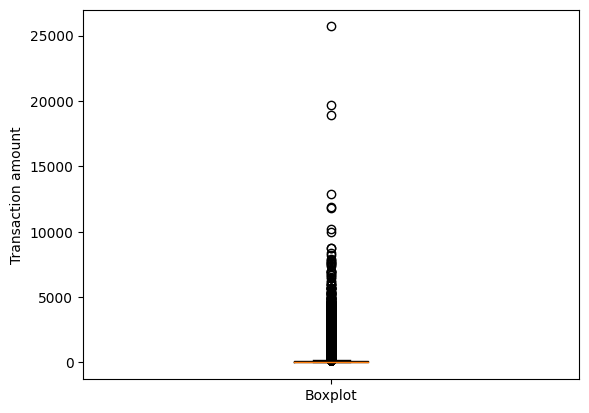

In [27]:
plt.boxplot(df['Amount'], labels = ['Boxplot'])
plt.ylabel('Transaction amount')
amount = df[['Amount']].sort_values(by='Amount')
q1, q3 = np.percentile(amount,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
plt.plot()
print('Number of outliers above the upper bound: ', amount[amount['Amount'] > upper_bound].count()[0],
      ' ({:.4}%)'.format(amount[amount['Amount'] > upper_bound].count()[0] / amount['Amount'].count() * 100))

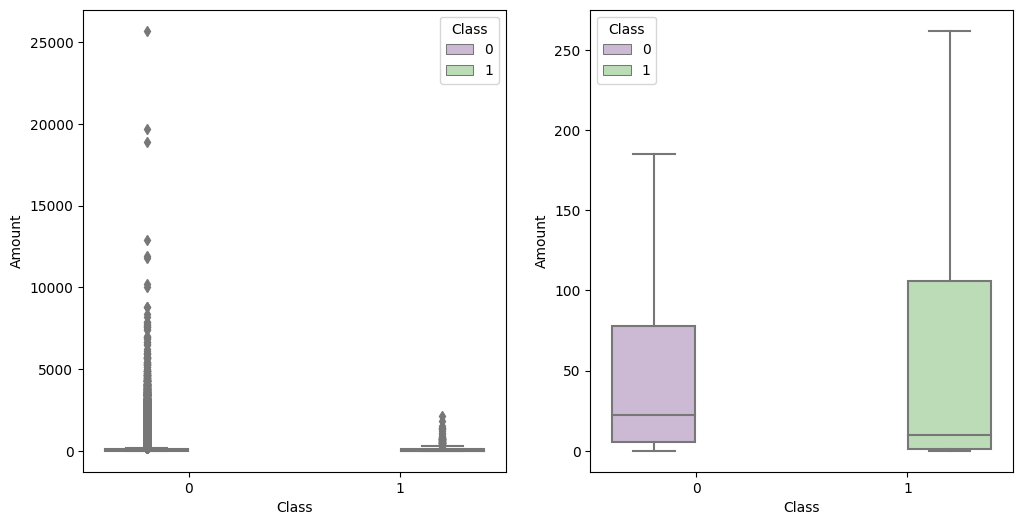

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)

In [29]:
def detect_outliers(data:pd.DataFrame, col_name:str, p=1.5) ->int:
    '''
    Robust Scaler
    this function detects outliers based on 3 time IQR and
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(data[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(data[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(p*IQR)
    lower_limit = first_quartile-(p*IQR)
    outlier_count = 0
                      
    for value in data[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [30]:
features = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
iqr=2
print(f"Number of Outliers for {iqr}*IQR after Logarithmed\n")

total=0
for col in features:
    if detect_outliers(df_filter, col)[2] > 0:
        outliers=detect_outliers(df, col, iqr)[2]
        total+=outliers
        print("{} outliers in '{}'".format(outliers,col))
print("\n{} OUTLIERS TOTALLY".format(total))

Number of Outliers for 2*IQR after Logarithmed

4342 outliers in 'V1'
8872 outliers in 'V2'
1764 outliers in 'V3'
4750 outliers in 'V4'
5985 outliers in 'V5'
18954 outliers in 'V6'
5725 outliers in 'V7'
17099 outliers in 'V8'
2915 outliers in 'V9'
5624 outliers in 'V10'
312 outliers in 'V11'
8214 outliers in 'V12'
403 outliers in 'V13'
6998 outliers in 'V14'
565 outliers in 'V15'
2860 outliers in 'V16'
3899 outliers in 'V17'
1717 outliers in 'V18'
4449 outliers in 'V19'
20631 outliers in 'V20'
11071 outliers in 'V21'
599 outliers in 'V22'
13211 outliers in 'V23'
446 outliers in 'V24'
2206 outliers in 'V25'
1254 outliers in 'V26'
27395 outliers in 'V27'
21051 outliers in 'V28'
25950 outliers in 'Amount'

229261 OUTLIERS TOTALLY


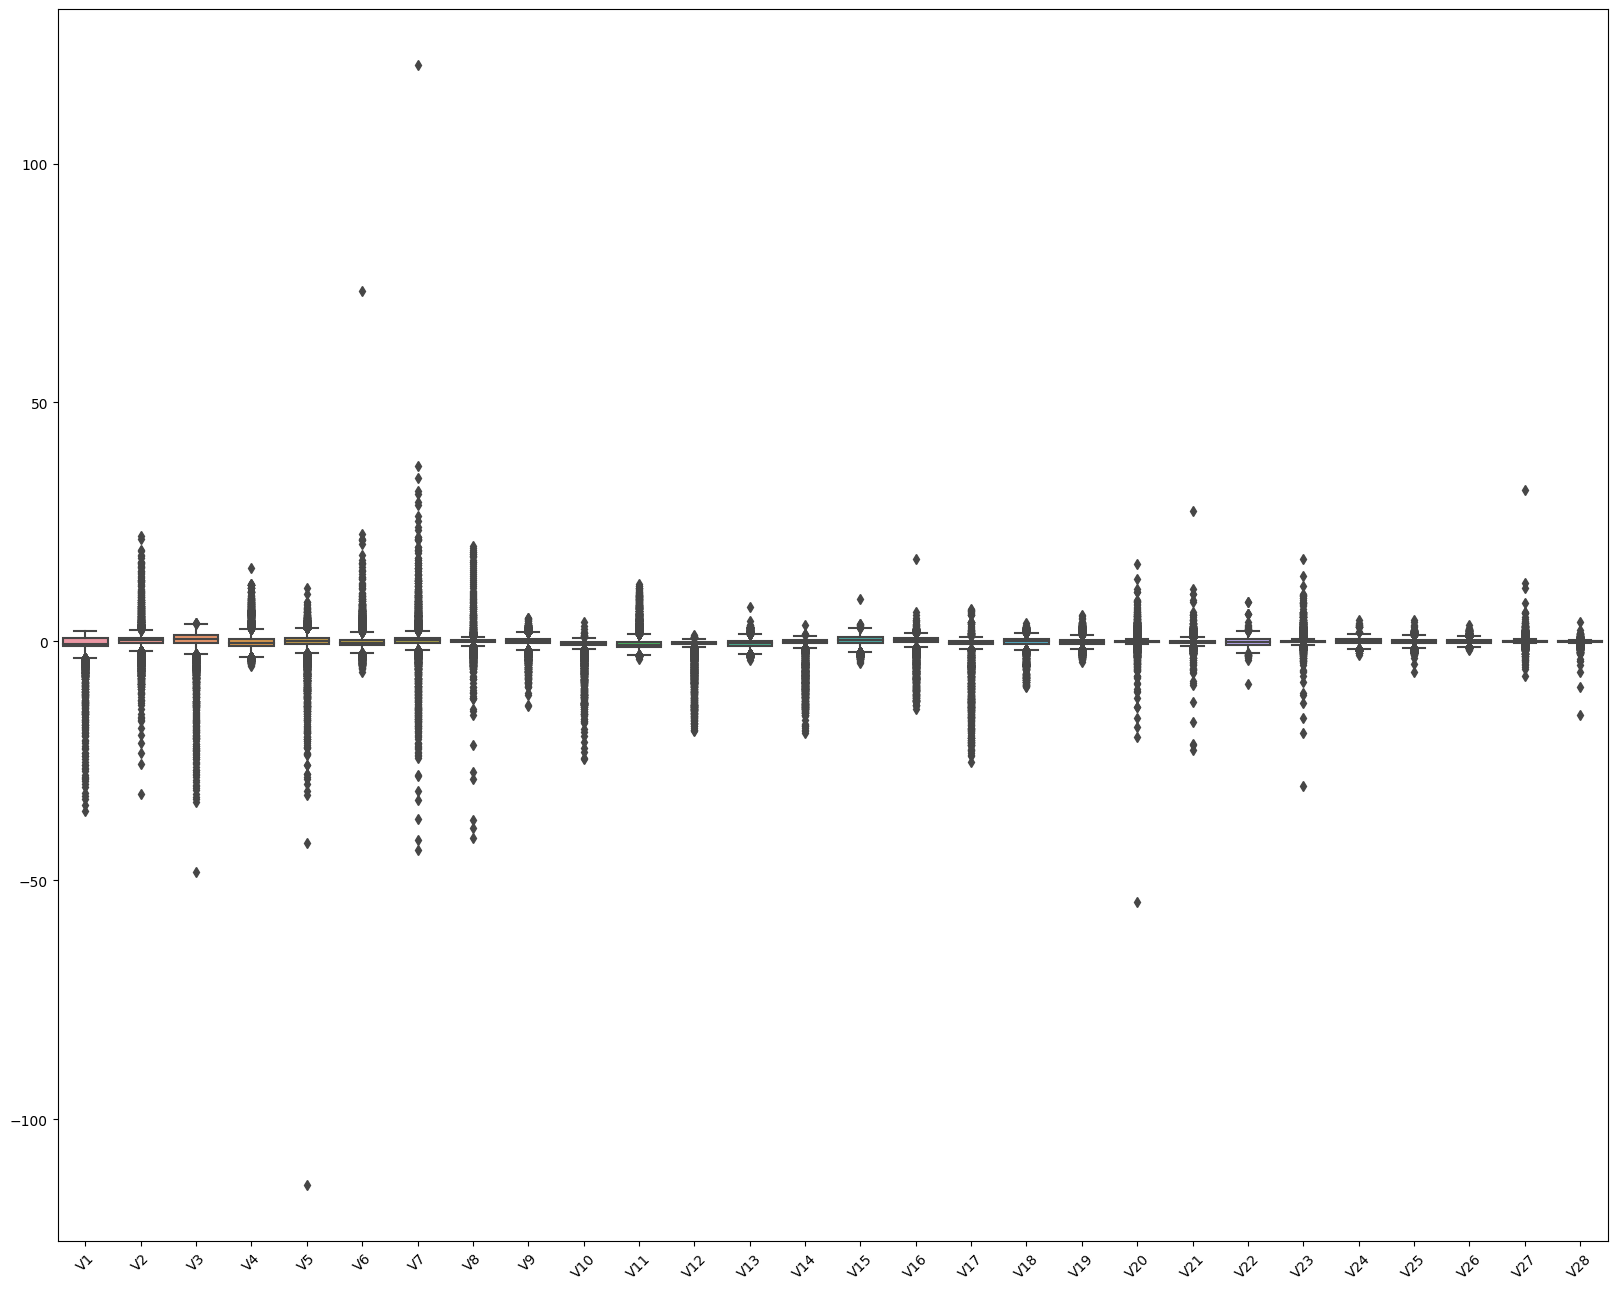

In [31]:
plt.figure(figsize=(20,16))
sns.boxplot(data = df_filter.loc[:,(df_filter.columns != 'Time') & (df_filter.columns != 'Amount')& (df_filter.columns != 'Class')])
plt.xticks(rotation=45);

In [32]:
df_filter[df_filter.Class == 0].Amount.describe()

count    32547.000000
mean        94.274576
std        324.566115
min          0.000000
25%          4.260000
50%         18.710000
75%         70.000000
max      25691.160000
Name: Amount, dtype: float64

In [33]:
df_filter[df_filter.Class == 1].Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [34]:
df_filter[df_filter.Class == 0].Time.describe()

count     32547.000000
mean      93890.345009
std       46473.829905
min           0.000000
25%       54425.000000
50%       80167.000000
75%      138588.000000
max      172792.000000
Name: Time, dtype: float64

In [35]:
df_filter[df_filter.Class == 1].Time.describe()

count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

## 2. Data Preprocessing

In [36]:
# Data Pre-processing Libraries
from sklearn.model_selection import cross_validate, cross_val_score,GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict,StratifiedKFold

from imblearn.over_sampling import SMOTE

# Modelling Libraries
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
from sklearn.metrics import classification_report, plot_confusion_matrix,plot_roc_curve,roc_auc_score,f1_score,recall_score
from sklearn.metrics import plot_precision_recall_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

## Comparison of models with scale (No Smote) in Orjinal Data 

In [37]:
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

RF_OriginalData


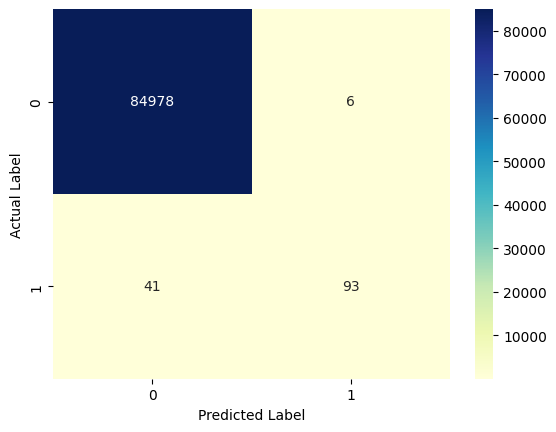

ROC AUC Score: 0.9762706869493257
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.94      0.69      0.80       134

    accuracy                           1.00     85118
   macro avg       0.97      0.85      0.90     85118
weighted avg       1.00      1.00      1.00     85118

Confusion matrix:
 [[84978     6]
 [   41    93]]


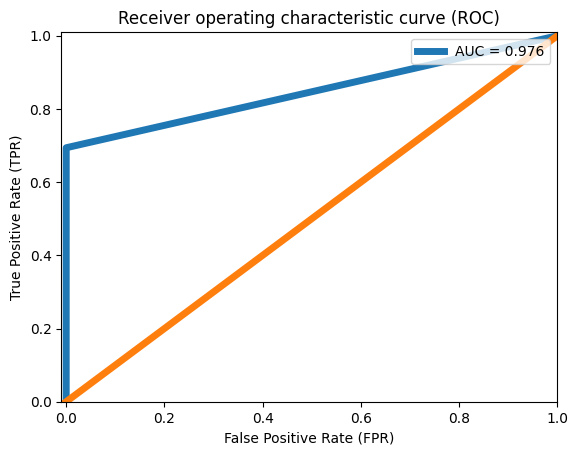

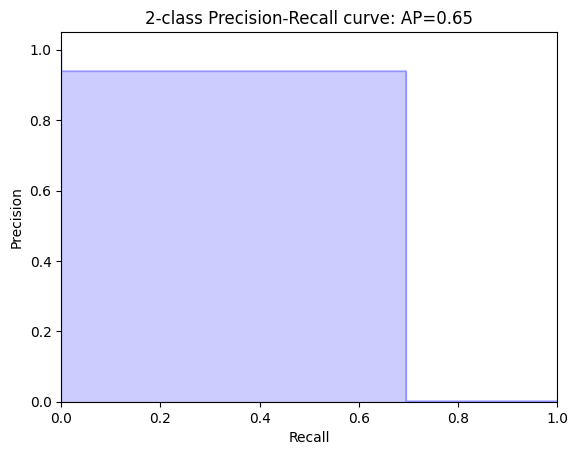

DT_OriginalData


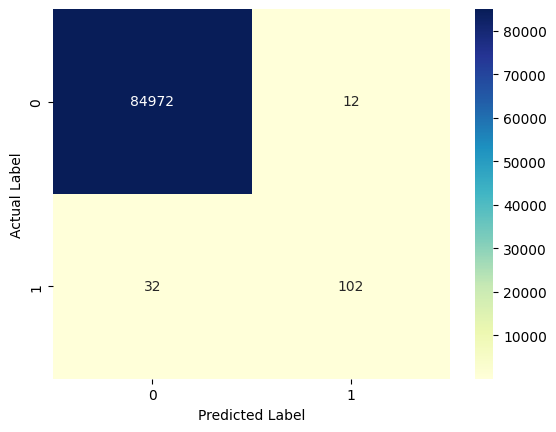

ROC AUC Score: 0.8657309154594157
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.89      0.76      0.82       134

    accuracy                           1.00     85118
   macro avg       0.95      0.88      0.91     85118
weighted avg       1.00      1.00      1.00     85118

Confusion matrix:
 [[84972    12]
 [   32   102]]


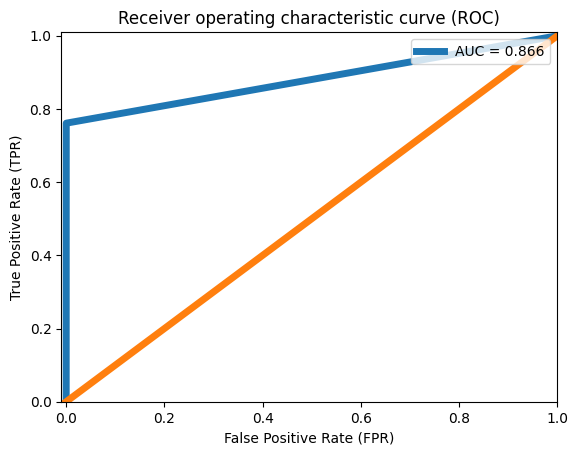

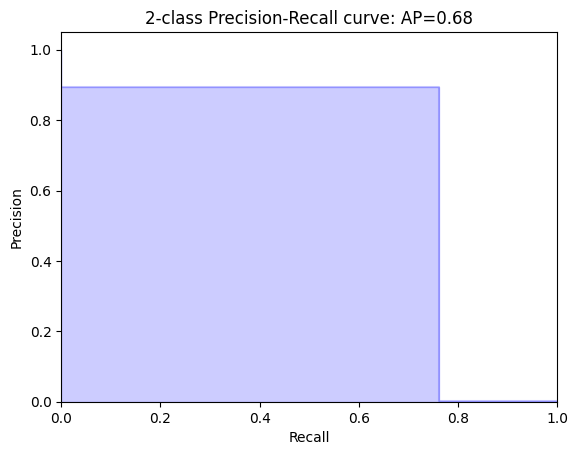

array([2, 1, 0])

In [38]:
X = df.drop(['Class'],axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

models = []

models.append(('RF_OriginalData', RandomForestClassifier(bootstrap=True,
                               criterion='entropy',
                               max_depth=8, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=30, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)))
models.append(('DT_OriginalData', DecisionTreeClassifier(random_state=42, max_depth=6)))

name_list = []
accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []

for name,model in models:
    print(name)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    recall_scores.append(recall_score(y_test,y_pred))
    f1_scores.append(f1_score(y_test,y_pred))
    precision_scores.append(precision_score(y_test,y_pred))    
    name_list.append(name)
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Create true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

# Calculate Area Under the Receiver Operating Characteristic Curve 
    probs = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, probs[:, 1])
    print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate average precision 
    average_precision = average_precision_score(y_test, y_pred)

# Define a roc_curve function
    def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
        plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
        plt.plot([0,1],[0,1], linewidth=5)
        plt.xlim([-0.01, 1])
        plt.ylim([0, 1.01])
        plt.legend(loc='upper right')
        plt.title('Receiver operating characteristic curve (ROC)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.xlabel('False Positive Rate (FPR)')
        plt.show()

# Define a precision_recall_curve function
    def plot_pr_curve(recall, precision, average_precision):
        plt.step(recall, precision, color='b', alpha=0.2, where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
        plt.show()

# Print the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_pred))
    print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_pred))

# Plot the roc curve 
    plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
    plot_pr_curve(recall, precision, average_precision)
        

    result = {"Model":name_list,"Accuracy Score":accuracy_scores,"Recall Score":recall_scores, \
              "F1 Score" :f1_scores, "Precision Score":precision_scores }  
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score")
dataframe.reset_index(drop=True)
threshold

## Comparison of the models with scaling in df_filter

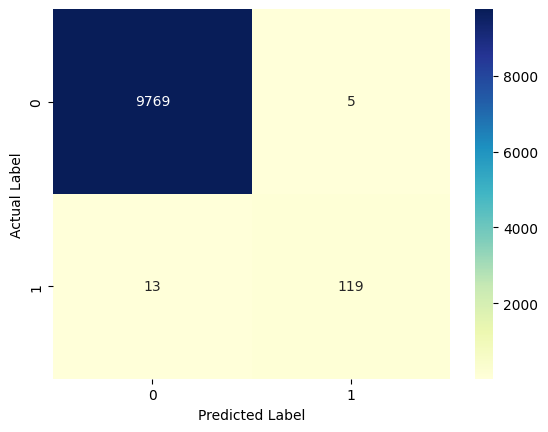

ROC AUC Score: 0.999718641293227
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9774
           1       0.96      0.90      0.93       132

    accuracy                           1.00      9906
   macro avg       0.98      0.95      0.96      9906
weighted avg       1.00      1.00      1.00      9906

Confusion matrix:
 [[9769    5]
 [  13  119]]


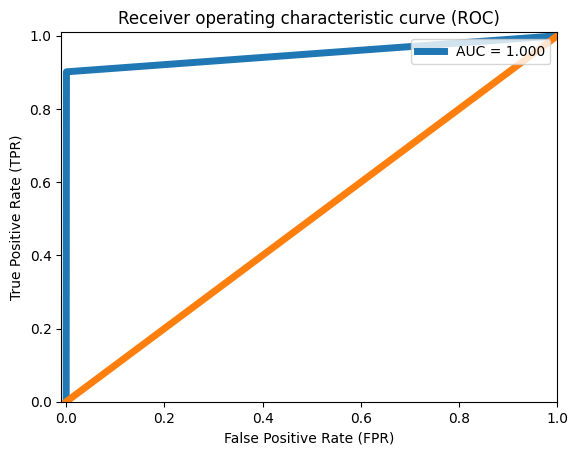

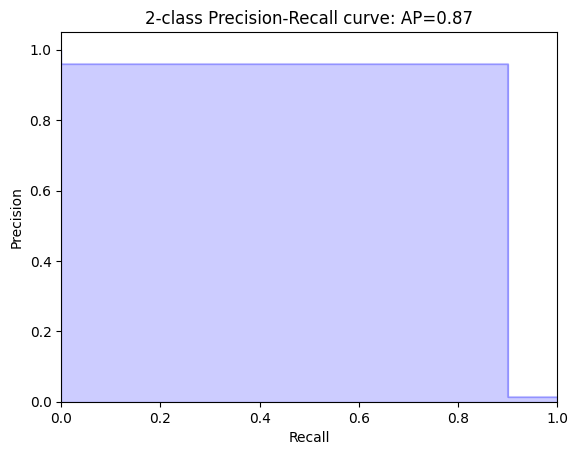

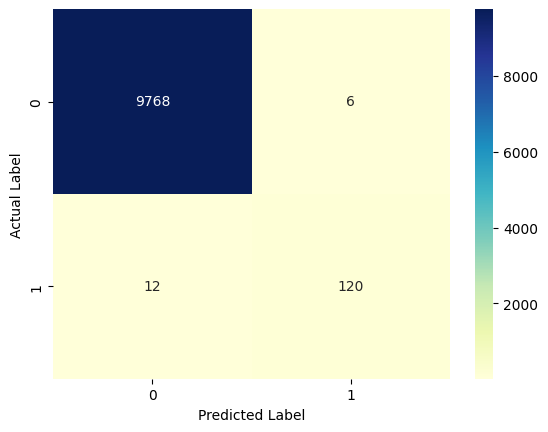

ROC AUC Score: 0.927849706394826
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9774
           1       0.95      0.91      0.93       132

    accuracy                           1.00      9906
   macro avg       0.98      0.95      0.96      9906
weighted avg       1.00      1.00      1.00      9906

Confusion matrix:
 [[9768    6]
 [  12  120]]


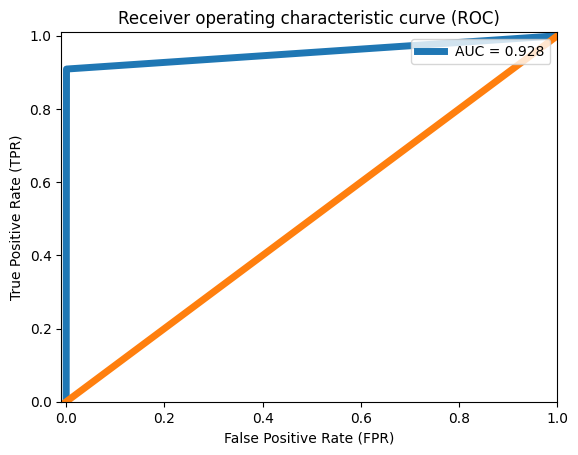

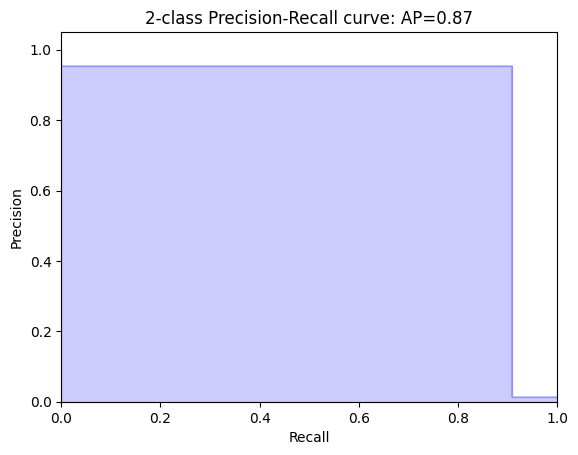

array([2, 1, 0])

In [39]:
#df_filter = df[(df["Class"] == 1) | (df["V17"]< 0.4) & (df["V14"]< 0.5) & (df["V12"] < 0.1) & (df["V10"]<=0.2)]

X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)


models = []

models.append(('RF_Threshold', RandomForestClassifier(bootstrap=True,
                               criterion='entropy',
                               max_depth=8, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=30, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)))
models.append(('DT_Threshold', DecisionTreeClassifier(random_state=42, max_depth=6)))

name_list = []
accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []

for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    recall_scores.append(recall_score(y_test,y_pred))
    f1_scores.append(f1_score(y_test,y_pred))
    precision_scores.append(precision_score(y_test,y_pred))    
    name_list.append(name)
   
    cnf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Create true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

# Calculate Area Under the Receiver Operating Characteristic Curve 
    probs = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, probs[:, 1])
    print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate average precision 
    average_precision = average_precision_score(y_test, y_pred)

# Define a roc_curve function
    def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
        plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
        plt.plot([0,1],[0,1], linewidth=5)
        plt.xlim([-0.01, 1])
        plt.ylim([0, 1.01])
        plt.legend(loc='upper right')
        plt.title('Receiver operating characteristic curve (ROC)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.xlabel('False Positive Rate (FPR)')
        plt.show()

# Define a precision_recall_curve function
    def plot_pr_curve(recall, precision, average_precision):
        plt.step(recall, precision, color='b', alpha=0.2, where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
        plt.show()

# Print the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_pred))
    print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_pred))

# Plot the roc curve 
    plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
    plot_pr_curve(recall, precision, average_precision)

    result = {"Model":name_list,"Accuracy Score":accuracy_scores,"Recall Score":recall_scores, \
              "F1 Score" :f1_scores, "Precision Score":precision_scores }  
      
     
dataframe = pd.DataFrame(result).sort_values(by="F1 Score")
dataframe.reset_index(drop=True)
threshold

In [40]:
threshold

array([2, 1, 0])

- ## With Smote and Scale

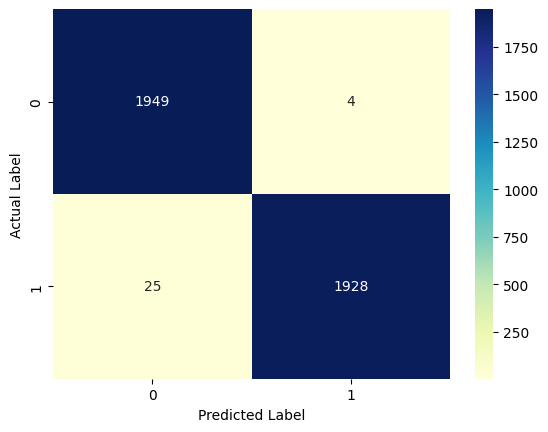

ROC AUC Score: 0.9990024143931284
Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1953
           1       1.00      0.99      0.99      1953

    accuracy                           0.99      3906
   macro avg       0.99      0.99      0.99      3906
weighted avg       0.99      0.99      0.99      3906

Confusion matrix:
 [[1949    4]
 [  25 1928]]


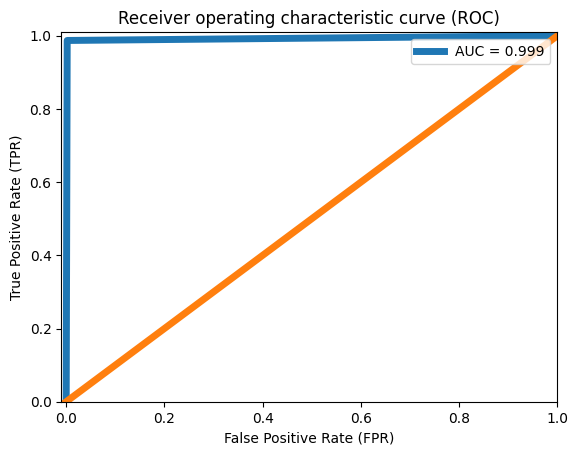

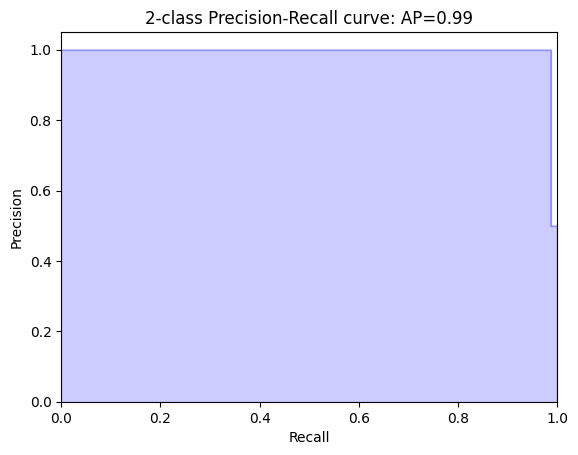

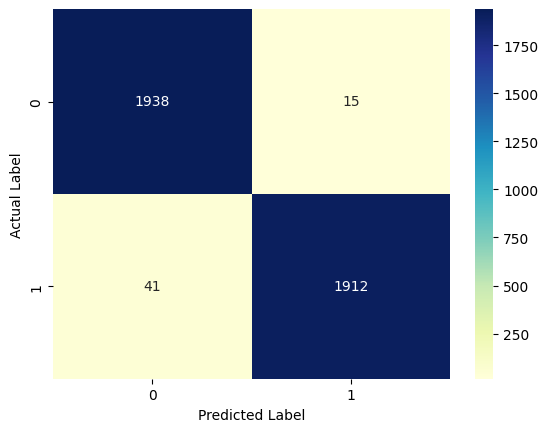

ROC AUC Score: 0.9846301028601211
Classification report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1953
           1       0.99      0.98      0.99      1953

    accuracy                           0.99      3906
   macro avg       0.99      0.99      0.99      3906
weighted avg       0.99      0.99      0.99      3906

Confusion matrix:
 [[1938   15]
 [  41 1912]]


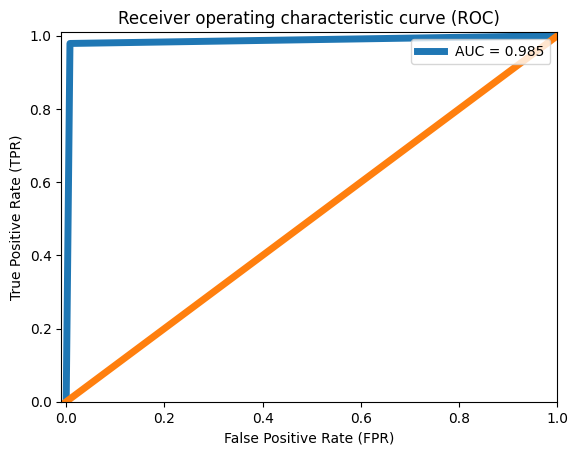

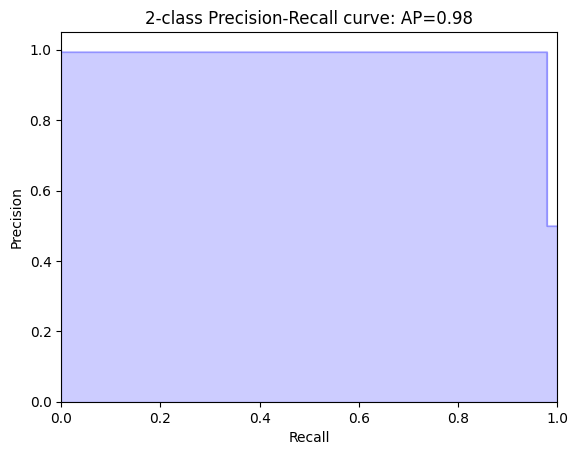

array([2, 1, 0])

In [41]:
scaler = RobustScaler()

X = df_filter.drop(['Class'],axis=1)
y = df_filter['Class']

over = SMOTE(sampling_strategy=.2)
under = RandomUnderSampler(sampling_strategy=1)
steps=[('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

X, y = pipeline.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify = y)
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

models = []

models.append(('RF_Smote', RandomForestClassifier(bootstrap=True,
                               criterion='entropy',
                               max_depth=8, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=30, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)))
models.append(('DT_Smote', DecisionTreeClassifier(max_depth=8,random_state = 42)))

name_list = []
accuracy_scores = []
recall_scores = []
f1_scores = []
precision_scores = []

for name,model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test,y_pred))
    recall_scores.append(recall_score(y_test,y_pred))
    f1_scores.append(f1_score(y_test,y_pred))
    precision_scores.append(precision_score(y_test,y_pred))    
    name_list.append(name)
    
    cnf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    # Create true and false positive rates
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred)

# Calculate Area Under the Receiver Operating Characteristic Curve 
    probs = model.predict_proba(X_test)
    roc_auc = roc_auc_score(y_test, probs[:, 1])
    print('ROC AUC Score:',roc_auc)

# Obtain precision and recall 
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

# Calculate average precision 
    average_precision = average_precision_score(y_test, y_pred)

# Define a roc_curve function
    def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
        plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
        plt.plot([0,1],[0,1], linewidth=5)
        plt.xlim([-0.01, 1])
        plt.ylim([0, 1.01])
        plt.legend(loc='upper right')
        plt.title('Receiver operating characteristic curve (ROC)')
        plt.ylabel('True Positive Rate (TPR)')
        plt.xlabel('False Positive Rate (FPR)')
        plt.show()

# Define a precision_recall_curve function
    def plot_pr_curve(recall, precision, average_precision):
        plt.step(recall, precision, color='b', alpha=0.2, where='post')
        plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.ylim([0.0, 1.05])
        plt.xlim([0.0, 1.0])
        plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
        plt.show()

# Print the classifcation report and confusion matrix
    print('Classification report:\n', classification_report(y_test, y_pred))
    print('Confusion matrix:\n',confusion_matrix(y_true = y_test, y_pred = y_pred))

# Plot the roc curve 
    plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

# Plot recall precision curve
    plot_pr_curve(recall, precision, average_precision)
    
    result = {"Model":name_list,"Accuracy Score":accuracy_scores,"Recall Score":recall_scores, \
              "F1 Score" :f1_scores, "Precision Score":precision_scores }  
     
          
dataframe = pd.DataFrame(result).sort_values(by="F1 Score",ascending=False)
dataframe.reset_index(drop=True)
threshold